In [1]:
%matplotlib inline

import numpy as np
import os
import sys
import random
import math
import matplotlib as plt

radius = 10
num = 300
input_data = np.random.uniform(-radius, radius, (num, 2))

def kmeans(input_data, k):
    # perform k-means clustering
    # ref: https://home.deib.polimi.it/matteucc/Clustering/tutorial_html/kmeans.html

    # initialize mean vectors
    prev_means = np.random.uniform(0, 10, (k, 2))
    cur_means = np.random.uniform(0, 10, (k, 2))
    
    # mapping array showing that which cluster a point belongs to
    clusters = np.random.randint(0, k, input_data.shape[0])

    # repeat until there are no changes in mean vectors
    while (prev_means != cur_means).all():
        prev_means = cur_means.copy()

        # Step 1: use the estimated means to classify data samples
        for i, data in enumerate(input_data):
            min_mean = 0 # index of mean
            min_dist = 9999  # current minimum distance

            # data => [x, y]
            # check which centroid is the nearest
            for j, mean in enumerate(cur_means):
                dist = distance(data, mean)
                if dist < min_dist:
                    min_mean = j
                    min_dist = dist

            # update the cluster this point belongs to
            clusters[i] = min_mean

        # Step 2: replace means with mean of current data samples belonging to cluster i
        for j, mean in enumerate(cur_means):
            indices = np.where(clusters == j)
            samples = input_data[indices]
            if len(samples) != 0:
                cur_means[j] = np.mean(samples, axis=0)

    # return cluster info and means of clusters
    return clusters, cur_means

def distance(p1, p2):
    d1 = p1[0]-p2[0]
    d2 = p1[1]-p2[1]
    return math.sqrt( d1*d1 + d2*d2 )

k = 10
clusters, means = kmeans(input_data, k)
print('*'*50)
print (means)
print (clusters)

**************************************************
[[ 6.89074234  6.8826605 ]
 [ 8.72622663  7.02000957]
 [ 3.12143209  7.21223411]
 [-0.51569781  4.61986026]
 [ 8.04079975 -0.19360374]
 [-4.8915457  -4.1341086 ]
 [-6.27571783  5.65130932]
 [ 5.28635023 -6.32514816]
 [ 3.36416825  2.36129769]
 [ 4.94125634  9.58074981]]
[1 7 5 8 6 7 3 7 6 5 7 0 5 9 5 5 6 4 5 5 8 4 6 6 5 7 6 2 6 4 7 6 1 5 6 8 5
 4 5 4 7 5 7 7 6 5 4 1 4 0 3 5 6 5 6 7 7 1 6 4 3 4 5 4 1 7 6 5 7 7 0 7 6 6
 7 8 5 0 3 5 4 6 5 3 8 0 6 3 6 4 2 8 5 0 5 6 3 7 7 5 4 7 8 5 7 7 5 8 3 6 7
 3 6 3 5 1 4 4 1 3 7 5 8 5 5 6 4 8 7 5 5 5 5 4 2 7 5 6 9 4 7 8 6 4 5 5 1 5
 7 4 6 6 6 5 3 2 7 0 1 2 7 0 5 3 6 7 5 6 7 6 7 5 8 5 7 5 5 8 5 7 7 3 7 7 2
 6 5 4 5 7 5 7 5 5 5 2 1 8 7 8 7 3 6 6 8 6 3 0 7 7 5 7 5 8 6 6 3 8 3 8 5 9
 7 7 7 5 8 3 4 4 5 7 8 3 6 5 8 6 6 5 7 6 0 1 6 6 5 6 8 6 7 4 7 7 6 2 7 6 5
 5 2 8 4 6 6 8 5 8 5 7 5 7 2 7 6 7 5 1 5 7 0 0 8 8 5 6 7 5 3 6 6 5 3 6 6 4
 7 7 5 4]


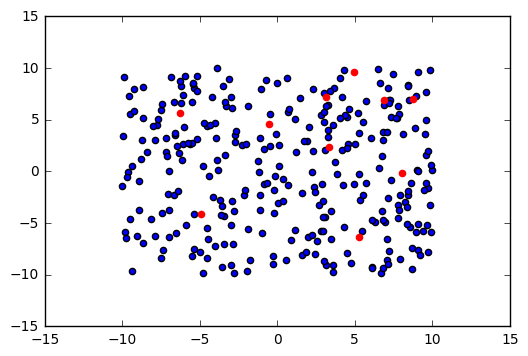

In [2]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm

x = []
y = []
for data in input_data:
    x.append(data[0])
    y.append(data[1])

mean_x = []
mean_y = []
for mean in means:
    mean_x.append(mean[0])
    mean_y.append(mean[1])

plt.scatter(x, y)
plt.scatter(mean_x, mean_y, color='red')
plt.show()
